<a href="https://colab.research.google.com/github/FABI0LITA/mining_2022/blob/main/%EC%95%84%EB%B9%84%ED%98%81_%ED%8C%80%ED%94%8C_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#임포트

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

plt.rc('font', family='NanumGothic') 
plt.rc("axes", unicode_minus=False)

import matplotlib
matplotlib.font_manager._rebuild()
#한글이 깨지지 않도록 하는 코드. 한글이 깨질시 이 코드를 재 실행하고 실행해보세요.

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
from google.colab import drive
drive.mount('/content/drive')
#구글 드라이브 마운팅

Mounted at /content/drive


In [6]:
market = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/market_price.csv", encoding= 'cp949')
#csv 파일 받으실 때 여러분 경로에 맞게 수정하셔야 엔코딩 됩니다
#utp-8로 인코딩할시 16진수 때문에 에러남. cp949로 엔코딩했음

# 전처리

### 데이터 살펴보기 및 전처리

In [7]:
print(market.columns)
display(market.info())

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89899 entries, 0 to 89898
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   일련번호               89899 non-null  int64 
 1   시장/마트 번호           89899 non-null  int64 
 2   시장/마트 이름           89899 non-null  object
 3   품목 번호              89899 non-null  int64 
 4   품목 이름              89855 non-null  object
 5   실판매규격              89899 non-null  object
 6   가격(원)              89899 non-null  int64 
 7   년도-월               89899 non-null  object
 8   비고                 89452 non-null  object
 9   시장유형 구분(시장/마트) 코드  89899 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  89899 non-null  object
 11  자치구 코드             89899 non-null  int64 
 12  자치구 이름             89899 non-nul

None

In [ ]:
market.head() #위 아래 csv 러프하게 확인해봄.

In [10]:
market.tail() #필요없는 행 확인. 일련번호, 시장/마트 번호, 자치구코드, 자치구 이름, 비고는 그냥 열 삭제 하기로, 년도-월은 점검일자와 겹침

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
89894,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
89895,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
89896,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
89897,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
89898,1724779,154,홈플러스 강동점,266,"고등어(생물,국산)",1마리,3990,2021-12,국내산2마리7980,2,대형마트,740000,강동구,2021-12-30


In [11]:
df = market.drop(['일련번호','시장/마트 번호','자치구 코드','년도-월', '비고'], axis=1)

In [12]:
df.head() #삭제하고 보니 코드, 이름 등 열 이름이 너무 불필요하게 긺. 이를 깔끔하게 수정하고자 함.

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 이름,점검일자
0,롯데마트 구로점,28,사과,1개 (300g),1598,2,대형마트,구로구,2021-01-21
1,롯데마트 구로점,27,배,1개 (600g),1590,2,대형마트,구로구,2021-01-21
2,롯데마트 구로점,26,배추,1포기(2kg),3990,2,대형마트,구로구,2021-01-21
3,롯데마트 구로점,25,무,1개 (900g),1990,2,대형마트,구로구,2021-01-21
4,롯데마트 구로점,24,양파,1개 (200g),990,2,대형마트,구로구,2021-01-21


In [13]:
df.rename(columns={'시장유형 구분(시장/마트) 코드':'유형 코드', '시장유형 구분(시장/마트) 이름':'시장 유형', '점검일자':'일자'}, inplace=True)
#불필요하게 긴 열 이름을 변경, 기존 df에 변경을 주기 위하여 inplace는 True 값으로 설정
#점검일자는 그냥 일자로 변경
df.head()

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),유형 코드,시장 유형,자치구 이름,일자
0,롯데마트 구로점,28,사과,1개 (300g),1598,2,대형마트,구로구,2021-01-21
1,롯데마트 구로점,27,배,1개 (600g),1590,2,대형마트,구로구,2021-01-21
2,롯데마트 구로점,26,배추,1포기(2kg),3990,2,대형마트,구로구,2021-01-21
3,롯데마트 구로점,25,무,1개 (900g),1990,2,대형마트,구로구,2021-01-21
4,롯데마트 구로점,24,양파,1개 (200g),990,2,대형마트,구로구,2021-01-21


## 날짜 포맷 변경




In [14]:
df.dtypes #일자의 데이터 타입 확인, object형임

시장/마트 이름    object
품목 번호        int64
품목 이름       object
실판매규격       object
가격(원)        int64
유형 코드        int64
시장 유형       object
자치구 이름      object
일자          object
dtype: object

In [15]:
df['일자2'] = pd.to_datetime(df['일자'], format='%Y-%m-%d') #변경해줄 새로운 열을 datetime으로 생성 (일자2)
df.head()

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),유형 코드,시장 유형,자치구 이름,일자,일자2
0,롯데마트 구로점,28,사과,1개 (300g),1598,2,대형마트,구로구,2021-01-21,2021-01-21
1,롯데마트 구로점,27,배,1개 (600g),1590,2,대형마트,구로구,2021-01-21,2021-01-21
2,롯데마트 구로점,26,배추,1포기(2kg),3990,2,대형마트,구로구,2021-01-21,2021-01-21
3,롯데마트 구로점,25,무,1개 (900g),1990,2,대형마트,구로구,2021-01-21,2021-01-21
4,롯데마트 구로점,24,양파,1개 (200g),990,2,대형마트,구로구,2021-01-21,2021-01-21


In [16]:
df.dtypes #확인해보면 일자2의 데이터 타입이 datetime64인 것을 확인할 수 있음

시장/마트 이름            object
품목 번호                int64
품목 이름               object
실판매규격               object
가격(원)                int64
유형 코드                int64
시장 유형               object
자치구 이름              object
일자                  object
일자2         datetime64[ns]
dtype: object

In [17]:
df['일자3'] = df["일자2"].dt.strftime("%m/%d") #일자2의 데이터를 토대로 날짜 포맷을 변경하여 일자3을 생성한다
df

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),유형 코드,시장 유형,자치구 이름,일자,일자2,일자3
0,롯데마트 구로점,28,사과,1개 (300g),1598,2,대형마트,구로구,2021-01-21,2021-01-21,01/21
1,롯데마트 구로점,27,배,1개 (600g),1590,2,대형마트,구로구,2021-01-21,2021-01-21,01/21
2,롯데마트 구로점,26,배추,1포기(2kg),3990,2,대형마트,구로구,2021-01-21,2021-01-21,01/21
3,롯데마트 구로점,25,무,1개 (900g),1990,2,대형마트,구로구,2021-01-21,2021-01-21,01/21
4,롯데마트 구로점,24,양파,1개 (200g),990,2,대형마트,구로구,2021-01-21,2021-01-21,01/21
...,...,...,...,...,...,...,...,...,...,...,...
89894,홈플러스 강동점,320,달걀(30개),특란,6490,2,대형마트,강동구,2021-12-30,2021-12-30,12/30
89895,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2,대형마트,강동구,2021-12-30,2021-12-30,12/30
89896,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2,대형마트,강동구,2021-12-30,2021-12-30,12/30
89897,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2,대형마트,강동구,2021-12-30,2021-12-30,12/30


In [18]:
df = df.drop(['일자','일자2'], axis=1)

In [19]:
df.rename(columns={'일자3':'일자'}, inplace=True)
df
#기존에 있었던 열을 삭제하고 이름을 변경.

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),유형 코드,시장 유형,자치구 이름,일자
0,롯데마트 구로점,28,사과,1개 (300g),1598,2,대형마트,구로구,01/21
1,롯데마트 구로점,27,배,1개 (600g),1590,2,대형마트,구로구,01/21
2,롯데마트 구로점,26,배추,1포기(2kg),3990,2,대형마트,구로구,01/21
3,롯데마트 구로점,25,무,1개 (900g),1990,2,대형마트,구로구,01/21
4,롯데마트 구로점,24,양파,1개 (200g),990,2,대형마트,구로구,01/21
...,...,...,...,...,...,...,...,...,...
89894,홈플러스 강동점,320,달걀(30개),특란,6490,2,대형마트,강동구,12/30
89895,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2,대형마트,강동구,12/30
89896,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2,대형마트,강동구,12/30
89897,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2,대형마트,강동구,12/30


In [20]:
df['품목 번호'].unique()
#품목 번호는 다음과 같이 있음. 
#고등어는 13, 266, 304 냉동 268 수입산 318
#배추는 307(1포기 2.5~3kg), 26, 중간 175 271
#무는 25 308(1개 1kg) 125 세척무 274
#배는 306, 27, 276
#오징어는 253, 254, 냉동 256
#돼지고기와 달걀은 해당 규격에 해당하는 적절한 데이터를 제공하지 않아 농수산물 안으로 변경

array([ 28,  27,  26,  25,  24,  23,  22, 312, 278, 285,  18, 171, 320,
       303, 302, 253,  13, 305, 306, 175, 274, 309, 310, 119,  58,  99,
       283, 260, 152, 254, 266, 307, 311, 265, 304, 282, 131, 136, 133,
       202, 284, 271, 118, 258, 308, 315,  52, 256, 144, 264, 275, 268,
        82, 259, 277, 321, 138, 125, 272, 276, 288,  17, 257,  50, 314,
       237, 248, 244, 318, 269, 261, 135, 313, 263, 255,  54, 267, 316,
       134, 181, 184, 201, 129, 106, 262, 324, 176])

In [21]:
df = df.sort_values('품목 번호') #물품들을 뭉쳐놓기 위해 품목 번호로 오름차순 정렬시킴.
df.head()

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),유형 코드,시장 유형,자치구 이름,일자
47776,대림시장,13,고등어,1마리(380g),4000,1,전통시장,은평구,07/29
53929,뉴코아아울렛 강남점,13,고등어,1마리446g,4990,2,대형마트,서초구,08/26
34283,뉴코아아울렛 강남점,13,고등어,1마리274g,5990,2,대형마트,서초구,05/27
43865,롯데백화점 강남점,13,고등어,1마리,7500,2,대형마트,강남구,07/29
32823,청량리종합시장,13,고등어,1마리(280g),3000,1,전통시장,동대문구,05/27


In [22]:
pear_list=[306, 27, 276]
market_pear = df[df['품목 번호'].isin(pear_list)]
market_pear.head() #품목 번호로 따로 묶어서 배의 리스트를 만듦

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),유형 코드,시장 유형,자치구 이름,일자
40263,이마트 여의도점,27,배,1개(600g),4225,2,대형마트,영등포구,06/24
66321,영등포전통시장,27,배,1개(600g),4000,1,전통시장,영등포구,09/30
17560,인왕시장,27,배,1개(600g),4000,1,전통시장,서대문구,03/25
49647,현대백화점 신촌점,27,배,1개(670g),14500,2,대형마트,서대문구,07/29
53897,하나로클럽 양재점,27,배,1상자(6개)3000g,18800,2,대형마트,서초구,08/26


In [23]:
market_pear['품목 이름'].unique() #러프데이터가 이상하게 섞여있어, 결측치와 함께 사과 데이터를 market_pear에서 삭제하고자 함

array(['배', nan, '사과(부사)', '사과', '배(신고)', '배(신고, 600g)', '사과(부사, 300g)'],
      dtype=object)

In [24]:
market_pear = market_pear.dropna(axis=0) #결측치 삭제

In [25]:
apple = market_pear[market_pear['품목 이름'].str.contains('사과')].index #사과포함 행 삭제
market_pear.drop(apple, inplace=True)
market_pear

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),유형 코드,시장 유형,자치구 이름,일자
40263,이마트 여의도점,27,배,1개(600g),4225,2,대형마트,영등포구,06/24
66321,영등포전통시장,27,배,1개(600g),4000,1,전통시장,영등포구,09/30
17560,인왕시장,27,배,1개(600g),4000,1,전통시장,서대문구,03/25
49647,현대백화점 신촌점,27,배,1개(670g),14500,2,대형마트,서대문구,07/29
53897,하나로클럽 양재점,27,배,1상자(6개)3000g,18800,2,대형마트,서초구,08/26
...,...,...,...,...,...,...,...,...,...
49086,현대백화점 미아점,306,"배(신고, 600g)","1개 (2입 팩 21,000원)",10500,2,대형마트,성북구,07/29
88965,우림시장,306,"배(신고, 600g)",1개(600g),3000,1,전통시장,중랑구,12/30
32944,하나로클럽 미아점,306,"배(신고, 600g)",600g,4170,2,대형마트,강북구,05/27
34505,용문시장,306,"배(신고, 600g)",1팩 2개,6000,1,전통시장,용산구,05/27


In [26]:
market_pear['실판매규격'].unique() #실판매 규격이 난장판이라, 봉, 상자, 팩 및 그 외의 이상치가 들어간 행을 제거하고자 함

array(['1개(600g)', '1개(670g)', '1상자(6개)3000g', '1개 (550g)', '1개',
       '1개(550g)', '1개(700g)', '1개500g', '1개(836g)', '1개(800g)',
       '1개(650g)', '1개600g', '1개(750g)', '1개(544g)', '1개 (600g)',
       '1박스(2500g)', '1봉지(2.6kg)', '1박스(2650g)', '1개(540g)', '1개550g',
       '1개 (800g)', '10개(600g)', '1개(630g)', '1개(500g)', '1개(812g)',
       '1개(554g)', '1개818g', '1개681g', '1개(350g)', '1개798g', '1개(530g)',
       '1개686g', '1박스(3000g)', '1개(525g)', '2개1860g', '1개 (700g)',
       '1개650g', '1개800g', '1봉지(1.7kg)', '1개684g', '1개750g', '1개(510g)',
       '1봉(3개)2000g', '1개 (3입 팩  15,900원 )', '1개(739g)', '1개(610g)',
       '1상자(7개)5000g   ', '1봉(2kg)', '3개1봉2kg', '30개(1.8kg)',
       '1상자(5개)3000g', '1팩 3~4개', '1개 (5개  box 12,900원 )', '1개 600g',
       '1개742g', '1개936g', '1개(595g)', '1개790g', '1개610g', '1개 (500g)',
       '1개(570g)', '1봉(3개)1778g', '1개775g', '1봉(2개)1700g', '1봉(2개)1136g',
       '1개704g', '1개896g', '1개(325g)', '1개 (3입 팩  22,000)', '1봉(3개)1954g',
       '1개 (3개 팩  28,000원)',

In [27]:
non_data = market_pear[market_pear['실판매규격'].str.contains('봉|팩|상자|박스|망|2개1860|2개1300')].index #해당 문자 포함 행 전부 삭제
market_pear.drop(non_data, inplace=True)

In [28]:
non_data = market_pear[market_pear['실판매규격']=='0'].index
market_pear.drop(non_data, inplace=True)
non_data = market_pear[market_pear['실판매규격']=='10개(600g)'].index
market_pear.drop(non_data, inplace=True)
#0은 포함 시키면 행이 전부 날아가므로, 오로지 '0'으로 되어있는 요소의 행만 삭제
#10개는 위의 방식으로 하면 에러나서 이 방식으로 처리

In [29]:
market_pear['실판매규격'].unique() #1개만 남은 것을 확인할 수 있다

array(['1개(600g)', '1개(670g)', '1개 (550g)', '1개', '1개(550g)', '1개(700g)',
       '1개500g', '1개(836g)', '1개(800g)', '1개(650g)', '1개600g', '1개(750g)',
       '1개(544g)', '1개 (600g)', '1개(540g)', '1개550g', '1개 (800g)',
       '1개(630g)', '1개(500g)', '1개(812g)', '1개(554g)', '1개818g', '1개681g',
       '1개(350g)', '1개798g', '1개(530g)', '1개686g', '1개(525g)',
       '1개 (700g)', '1개650g', '1개800g', '1개684g', '1개750g', '1개(510g)',
       '1개(739g)', '1개(610g)', '30개(1.8kg)', '1개 (5개  box 12,900원 )',
       '1개 600g', '1개742g', '1개936g', '1개(595g)', '1개790g', '1개610g',
       '1개 (500g)', '1개(570g)', '1개775g', '1개704g', '1개896g', '1개(325g)',
       '1개1086g', '1개(515g)', '1개(제수용)', '1개(490g)', '1개(제수용,특)',
       '1개612g', '1개(590g)', '1개 769g', '1개744g', '1개 810g', '1개605g',
       '1개(536g)', '1개 821g', '1개652g', '1개648g', '1개828g', '1개(400g)',
       '1개 (300g)', '1개(620g)', '1개736g', '1개 768g', '1개 (4개 10,900원 )',
       '1개690g', '1개300g', '1개(450g)', '1개920g', '1개716g', '1개756g',
       '1

In [30]:
market_pear = market_pear.drop(['실판매규격', '품목 이름'], axis=1) #다 맞춰줬기 때문에, 규격과 이름을 밀고 다시 같은 요소로 통일시켜서 새로운 열을 생기게 하려고 함
market_pear['단위'] = '1'
market_pear['품목'] = '배'
market_pear


,시장/마트 이름,품목 번호,가격(원),유형 코드,시장 유형,자치구 이름,일자,단위,품목
40263,이마트 여의도점,27,4225,2,대형마트,영등포구,06/24,1,배
66321,영등포전통시장,27,4000,1,전통시장,영등포구,09/30,1,배
17560,인왕시장,27,4000,1,전통시장,서대문구,03/25,1,배
49647,현대백화점 신촌점,27,14500,2,대형마트,서대문구,07/29,1,배
40721,대림시장,27,4000,1,전통시장,은평구,06/24,1,배
...,...,...,...,...,...,...,...,...,...
63188,이마트 성수점,306,4933,2,대형마트,성동구,09/30,1,배
36298,롯데백화점 미아점,306,8270,2,대형마트,강북구,06/24,1,배
88965,우림시장,306,3000,1,전통시장,중랑구,12/30,1,배
32944,하나로클럽 미아점,306,4170,2,대형마트,강북구,05/27,1,배


In [31]:
#일자, 품목, 품목 번호, 단위, 가격, 시장이름, 시장 유형, 유형 코드 순으로 순서를 깔끔하게 변경하기로 함
#일자 순으로 정렬, 그리고 인덱스 재정렬
pear = market_pear[['일자', '품목', '품목 번호', '단위', '가격(원)', '시장/마트 이름', '시장 유형', '유형 코드', '자치구 이름']]
pear = pear.sort_values('일자')
pear.reset_index(drop=True, inplace=True)
pear
#품목 배에 대하여 전처리 완료
#같은 전처리를 품목별로 반복

,일자,품목,품목 번호,단위,가격(원),시장/마트 이름,시장 유형,유형 코드,자치구 이름
0,01/21,배,27,1,1590,롯데마트 구로점,대형마트,2,구로구
1,01/28,배,306,1,2180,이마트 성수점,대형마트,2,성동구
2,01/28,배,306,1,3500,마천중앙시장,전통시장,1,송파구
3,01/28,배,27,1,4000,대조시장,전통시장,1,은평구
4,01/28,배,306,1,3500,방이시장,전통시장,1,송파구
...,...,...,...,...,...,...,...,...,...
4246,12/30,배,306,1,2500,경동시장,전통시장,1,동대문구
4247,12/30,배,27,1,4330,홈플러스 월드컵점,대형마트,2,마포구
4248,12/30,배,306,1,6000,롯데백화점 잠실점,대형마트,2,송파구
4249,12/30,배,27,1,3000,대림중앙시장,전통시장,1,영등포구


In [32]:
mackerel_list=[13, 266, 304] #고등어 생물, 국내산
squid_list=[253, 254] #오징어 생물 
cabbage_list=[307, 26, 175, 271] #배추
radish_list=[25, 308, 125] #무(세척무 아님)

In [33]:
market_mackerel = df[df['품목 번호'].isin(mackerel_list)]
market_squid = df[df['품목 번호'].isin(squid_list)]
market_cabbage = df[df['품목 번호'].isin(cabbage_list)]
market_radish = df[df['품목 번호'].isin(radish_list)]

품목 이름 정리

In [34]:
market_mackerel['품목 이름'].unique()

array(['고등어', nan, '고등어(생물,국산)', '오징어(생물,국산)', '오징어(냉동,국산)'], dtype=object)

In [35]:
market_mackerel=market_mackerel.dropna(axis=0)
squid_non = market_mackerel[market_mackerel['품목 이름'].str.contains('오징어')].index
market_mackerel.drop(squid_non, inplace=True)
market_mackerel['품목 이름'].unique()

array(['고등어', '고등어(생물,국산)'], dtype=object)

In [36]:
market_squid['품목 이름'].unique()

array(['오징어', '오징어(생물,국산)', '명태(러시아,냉동)', '고등어(생물,수입산)', '명태(냉동,수입산)',
       '명태(45cm,수입산)', '명태(생물,수입산)', '고등어', '명태', '동태'], dtype=object)

In [37]:
market_squid=market_squid.dropna(axis=0)
fish_non = market_squid[market_squid['품목 이름'].str.contains('명태|동태|고등어')].index
market_squid.drop(fish_non, inplace=True)
market_squid['품목 이름'].unique()

array(['오징어', '오징어(생물,국산)'], dtype=object)

In [38]:
market_cabbage['품목 이름'].unique()

array(['배추', '배(신고)', '배(신고, 600g)', '배', '배추(중간)', '배추(2.5~3kg)'],
      dtype=object)

In [39]:
market_cabbage=market_cabbage.dropna(axis=0)
pear_non = market_cabbage[market_cabbage['품목 이름'].str.contains('신고')].index
market_cabbage.drop(pear_non, inplace=True)
pear_non = market_cabbage[market_cabbage['품목 이름']=='배'].index
market_cabbage.drop(pear_non, inplace=True)
market_cabbage['품목 이름'].unique()

array(['배추', '배추(중간)', '배추(2.5~3kg)'], dtype=object)

In [40]:
market_radish['품목 이름'].unique()

array(['무', '배추', '배추(2.5~3kg)', '배추(중간)', '배추(국산)', '무(1kg)'],
      dtype=object)

In [41]:
market_radish=market_radish.dropna(axis=0)
cab_non = market_radish[market_radish['품목 이름'].str.contains('배추')].index
market_radish.drop(cab_non, inplace=True)
market_radish['품목 이름'].unique()

array(['무', '무(1kg)'], dtype=object)

실판매규격 정리

In [42]:
market_mackerel = market_mackerel.query('실판매규격.str.contains("1마리")', engine='python')
#1마리 포함 행 다 뽑기
non_data = market_mackerel[market_mackerel['실판매규격'].str.contains('cm 2마리|cm 3마리|cm3마리|cm 4마리')].index
market_mackerel.drop(non_data, inplace=True)
market_mackerel['실판매규격'].unique()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['1마리(380g)', '1마리446g', '1마리274g', '1마리', '1마리(280g)', '1마리570g',
       '1마리(220g)', '1마리(400g)', '1마리 30cm ', '1마리[30cm]', '1마리(30cm)',
       '1마리(224g)', '1마리29cm', '1마리(320g)', '1마리 35cm ',
       '1마리 (3마리 5,000원)', '1마리25cm', '1마리(230g)', '1마리(321g)',
       '1마리 340g', '1마리330g', '1마리308g', '1마리(250g)', '1마리290g',
       '1마리390g', '1마리(350g)', '1마리288g', '1마리376g', '1마리(30m)',
       '1마리(410g)', '1마리30cm', '1마리30g676cm', '1마리(25cm)', '1마리(310g)',
       '1마리420g', '1마리480g', '1마리475g', '1마리470g', '1마리 30cm 6마리 ',
       '1마리320g', '1마리.25cm', '1마리  325g', '1마리642g', '1마리725g30cm',
       '1마리350g', '1마리(500g)', '1마리 330g', '1마리500g', '1마리(300g)',
       '1마리 335g', '1마리(35cm)', '1마리(520g)', '1마리650g', '1마리450g',
       '1마리374g', '1마리(450g)', '1마리 320g', '1마리 25cm', '1마리708g',
       '1마리(480g)', '1마리545g27cm', '1마리516g', '1마리588g', '1마리35cm ',
       '1마리490g', '1마리30cm)', '1마리534g', '1마리(386g)', '1마리(211g)',
       '1마리31cm', '1마리(270g)', '1마리(210g)', '1마리(240g)', '1

In [ ]:
market_squid = market_squid.query('실판매규격.str.contains("1마리")', engine='python')
non_data = market_squid[market_squid['실판매규격'].str.contains('cm 2마리|cm  2마리|cm 3마리|cm3마리|cm 4마리|cm 6마리|21마리')].index
market_squid.drop(non_data, inplace=True)
market_squid['실판매규격'].unique()

array(['1마리', '1마리[25cm]', '1마리(25cm)', '1마리(35cm)', '1마리(380g)',
       '1마리(400g)', '1마리(340g)', '1마리 30cm 1마리', '1마리 (4마리 10,000원)',
       '1마리(320g)', '1마리 390g', '1마리25cm', '1마리 494g', '1마리(30cm)',
       '1마리 395g', '1마리(300g)', '1마리  (3마리 5,000원)', '1마리360g', '1마리280g',
       '1마리175g', '1마리220g', '1마리 26cm', '1마리(237g)', '1마리(396g)',
       '1마리416g', '1마리(390g)', '1마리(40cm)', '1마리 (5마리 10,000원)',
       '1마리 35cm', '1마리230g', '1마리(230g)', '1마리(200g)', '1마리350g ',
       '1마리 280g', '1마리272g', '1마리400g', '1마리(220g)', '1마리 28cm',
       '1마리 (2마리 10,000원)', '1마리20cm', '1마리(280g)', '1마리(420g)',
       '1마리 385g', '1마리(350g)', '1마리 370g', '1마리(250g)',
       '1마리 (3마리 10,000원)', '1마리300g', '1마리 380g', '1마리332g', '1마리275g',
       '1마리 30cm ', '1마리 30cm', '1마리(4마리 10,000원)', '1마리25센치', '1마리180g',
       '1마리250g', '1마리.25cm', '1마리.20cm', '1마리(395g)', '1마리(392g)',
       '1마리(430g)', '1마리206g', '1마리193g', '1마리(40mc)', '1마리746g',
       '1마리235g', '1마리(370g)', '1마리 (300g)', '1마리(대)

In [ ]:
market_cabbage = market_cabbage.query('실판매규격.str.contains("1포기|1개")', engine='python')
#non_data = market_cabbage[market_cabbage['실판매규격'].str.contains('')].index
#market_cabbage.drop(non_data, inplace=True)
market_cabbage['실판매규격'].unique()

array(['1포기(2kg)', '1개2340g', '1포기', '1포기(2.2kg)', '1포기(2,750g)',
       '1포기(200g)', '1개2774g', '1포기(2.8kg)', '1포기(600g)', '1포기(1.7kg)',
       '1포기(2.5kg)', '1포기 2.5kg', '1포기 2.1kg', '1포기(1.5kg)',
       '1포기(3.35kg)', '1포기 ', '1포기(2750g)', '1포기(2.35kg)', '1포기(1.8kg)',
       '1포기(2.1kg)', '1포기 (3입 망  10,000원 )', '1포기 2.6kg', '1포기(2.6kg)',
       '1포기(3kg)', '1개2114g', '1포기(2800g)', '1포기(3.65kg)', '1포기(700g)',
       '1개2920g', '1포기1.7kg', '1포기(3.1kg)', '1포기(2790g)', '1개2308g',
       '1포기 2.4kg', '1개2140g', '1개2182g', '1개1356g', '1포기2.5-3kg',
       '1개2048g', '1포기1.5kg', '1포기(3.9kg)', '1포기(2.85kg)', '1포기  ',
       '1포기(1..8kg)', '1개3144g', '1개2330g', '1개1500g', '1개2662g',
       '1포기(530g)', '1개1578g', '1포기2.5kg', '1개2300g', '1개2932g',
       '1개2522g', '1개2474g', '1포기2kg', '1개1340g', '1개2076g', '1개2050g',
       '1개1588g', '1포기(2.3kg)', '1개2134g', '1개(1846g)', '1포기(3.5kg)',
       '1포기(1.3kg)', '1개2.5kg', '1포기(3.55kg)', '1개588g', '1개', '1개2460g',
       '1포기 (3입  망  11,000원 ', '1

In [ ]:
market_radish = market_radish.query('실판매규격.str.contains("1개")', engine='python')
market_radish['실판매규격'].unique()

array(['1개(2kg)', '1개(1.1kg)', '1개(1,6kg)', '1개(1.7kg)', '1개', '1개 ',
       '1개(800g)', '1개(1.8kg)', '1개(1kg)', '1개(1,2kg)', '1개(1.3kg)',
       '1개2960g', '1개(1319g)', '1개1360g', '1개1601g', '1개2272g',
       '1개(1.5kg)', '1개(1,8kg)', '1개(1.4kg)', '1개2352g', '1개 1.5kg',
       '1개(1.2kg)', '1개1416g', '1개(1.78kg)', '1개1868g', '1개(390g)',
       '1개(900g)', '1개(1,3kg)', '1개1590g', '1개1898g', '1개1660g',
       '1개1684g', '1개2098g', '1개(2.1kg)', '1개(1,5kg)', '1개(1.6kg)',
       '1개2366g', '1개1700g', '1개1662g', '1개(1.45kg)', '1개1.5kg',
       '1개1882g', '1개 1.2kg', '1개2306g', '1개(1567g)', '1개(1.65kg)',
       '1개(1.9kg)', '1개(2.kg)', '1개(2.3kg)', '1개1784g', '1개1922g',
       '1개(1200g)', '1개1594g', '1개1844g', '1개1724g', '1개1423g', '1개1910g',
       '1개1366g', '1개2066g', '1개2256g', '1개(1208g)', '1개1604g',
       '1개 1.6kg', '1개 1.3kg', '1개1526g', '1개1962g', '1개2218g', '1개   ',
       '1개(2.4kg)', '1개1934g', '1개2332g', '1개(2.7kg)', '1개1928g',
       '1개1680g', '1개1816g', '1개2236g', '1개(200g)

품목, 단위 통일

In [ ]:
market_mackerel = market_mackerel.drop(['실판매규격', '품목 이름'], axis=1)
market_mackerel['단위'] = '1'
market_mackerel['품목'] = '고등어'

In [ ]:
market_squid = market_squid.drop(['실판매규격', '품목 이름'], axis=1)
market_squid['단위'] = '1'
market_squid['품목'] = '오징어'

In [ ]:
market_cabbage = market_cabbage.drop(['실판매규격', '품목 이름'], axis=1)
market_cabbage['단위'] = '1'
market_cabbage['품목'] = '배추'

In [ ]:
market_radish = market_radish.drop(['실판매규격', '품목 이름'], axis=1)
market_radish['단위'] = '1'
market_radish['품목'] = '무'

## 전처리 마무리

In [ ]:
mackerel = market_mackerel[['일자', '품목', '품목 번호', '단위', '가격(원)', '시장/마트 이름', '시장 유형', '유형 코드', '자치구 이름']]
mackerel = mackerel.sort_values('일자')
mackerel.reset_index(drop=True, inplace=True)
mackerel

,일자,품목,품목 번호,단위,가격(원),시장/마트 이름,시장 유형,유형 코드,자치구 이름
0,01/21,고등어,13,1,5990,롯데마트 구로점,대형마트,2,구로구
1,01/28,고등어,266,1,6500,현대백화점 신촌점,대형마트,2,서대문구
2,01/28,고등어,266,1,8900,롯데백화점 미아점,대형마트,2,강북구
3,01/28,고등어,13,1,5990,뉴코아아울렛 강남점,대형마트,2,서초구
4,01/28,고등어,266,1,4000,화곡본동시장,전통시장,1,강서구
...,...,...,...,...,...,...,...,...,...
4170,12/30,고등어,266,1,2980,이마트 은평점,대형마트,2,은평구
4171,12/30,고등어,266,1,4000,대림시장,전통시장,1,은평구
4172,12/30,고등어,266,1,4990,NC백화점 불광점,대형마트,2,은평구
4173,12/30,고등어,266,1,4500,대림중앙시장,전통시장,1,영등포구


In [ ]:
squid = market_squid[['일자', '품목', '품목 번호', '단위', '가격(원)', '시장/마트 이름', '시장 유형', '유형 코드', '자치구 이름']]
squid = squid.sort_values('일자')
squid.reset_index(drop=True, inplace=True)
squid

,일자,품목,품목 번호,단위,가격(원),시장/마트 이름,시장 유형,유형 코드,자치구 이름
0,01/21,오징어,253,1,333,롯데마트 구로점,대형마트,2,구로구
1,01/28,오징어,253,1,4500,서울중앙시장,전통시장,1,중구
2,01/28,오징어,253,1,4600,서울중앙시장,전통시장,1,중구
3,01/28,오징어,254,1,6400,세이브 마트,대형마트,2,관악구
4,01/28,오징어,254,1,5000,장위골목시장,전통시장,1,성북구
...,...,...,...,...,...,...,...,...,...
3702,12/30,오징어,254,1,5000,목3동시장,전통시장,1,양천구
3703,12/30,오징어,254,1,4100,이마트 창동점,대형마트,2,도봉구
3704,12/30,오징어,254,1,6590,홈플러스 월드컵점,대형마트,2,마포구
3705,12/30,오징어,254,1,8000,롯데백화점 노원점,대형마트,2,노원구


In [ ]:
cabbage = market_cabbage[['일자', '품목', '품목 번호', '단위', '가격(원)', '시장/마트 이름', '시장 유형', '유형 코드', '자치구 이름']]
cabbage = cabbage.sort_values('일자')
cabbage.reset_index(drop=True, inplace=True)
cabbage

,일자,품목,품목 번호,단위,가격(원),시장/마트 이름,시장 유형,유형 코드,자치구 이름
0,01/21,배추,26,1,3990,롯데마트 구로점,대형마트,2,구로구
1,01/28,배추,307,1,2950,농협 하나로마트 용산점,대형마트,2,용산구
2,01/28,배추,26,1,2500,동원시장,전통시장,1,중랑구
3,01/28,배추,26,1,2280,이마트 상봉점,대형마트,2,중랑구
4,01/28,배추,26,1,4900,롯데백화점 영등포점,대형마트,2,영등포구
...,...,...,...,...,...,...,...,...,...
4266,12/30,배추,307,1,3990,홈플러스 등촌점,대형마트,2,강서구
4267,12/30,배추,307,1,8000,신세계백화점,대형마트,2,중구
4268,12/30,배추,307,1,4000,신창시장,전통시장,1,도봉구
4269,12/30,배추,307,1,5000,둔촌역전통시장,전통시장,1,강동구


In [ ]:
radish = market_radish[['일자', '품목', '품목 번호', '단위', '가격(원)', '시장/마트 이름', '시장 유형', '유형 코드', '자치구 이름']]
radish = radish.sort_values('일자')
radish.reset_index(drop=True, inplace=True)
radish

,일자,품목,품목 번호,단위,가격(원),시장/마트 이름,시장 유형,유형 코드,자치구 이름
0,01/21,무,25,1,1990,롯데마트 구로점,대형마트,2,구로구
1,01/28,무,25,1,1500,고척근린시장,전통시장,1,구로구
2,01/28,무,25,1,2290,홈플러스 영등포점,대형마트,2,영등포구
3,01/28,무,25,1,1580,이마트 여의도점,대형마트,2,영등포구
4,01/28,무,25,1,2500,영등포전통시장,전통시장,1,영등포구
...,...,...,...,...,...,...,...,...,...
4345,12/30,무,25,1,1500,뚝도시장,전통시장,1,성동구
4346,12/30,무,308,1,1000,신창시장,전통시장,1,도봉구
4347,12/30,무,25,1,2000,송화시장,전통시장,1,강서구
4348,12/30,무,308,1,2600,롯데백화점 강남점,대형마트,2,강남구


각 전처리 완료된 데이터 프레임을 호출하려면,

배 : pear | 고등어 : mackerel | 오징어 : squid | 배추 : cabbage | 무 : radish

로 호출하면 됩니다.

# 시각화

(1) 데이터프레임 내 시장 유형 분포

In [ ]:
#시각화 준비

%matplotlib inline
import pandas as pd
import seaborn as sns

#https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set_style("whitegrid") # choose a style for seaborn figure

In [ ]:
# 시각화시 한글 깨짐 오류 방지
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_

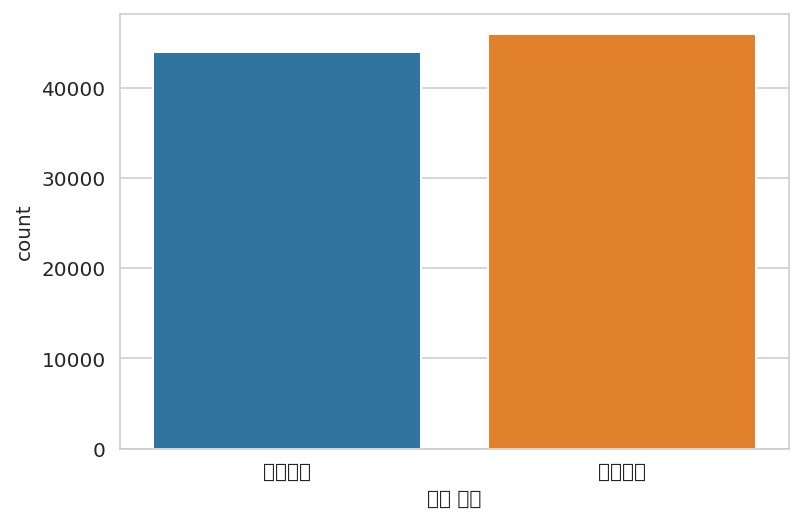

In [ ]:
sns.countplot(data=df, x='시장 유형') #전체 데이터프레임 내 시장 유형 (대형마트 vs 전통시장)

In [1]:
#품목별 구 분포
sns.countplot(data=df, x='품목 번호')

NameError: ignored

데이터프레임 내 구 분포

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

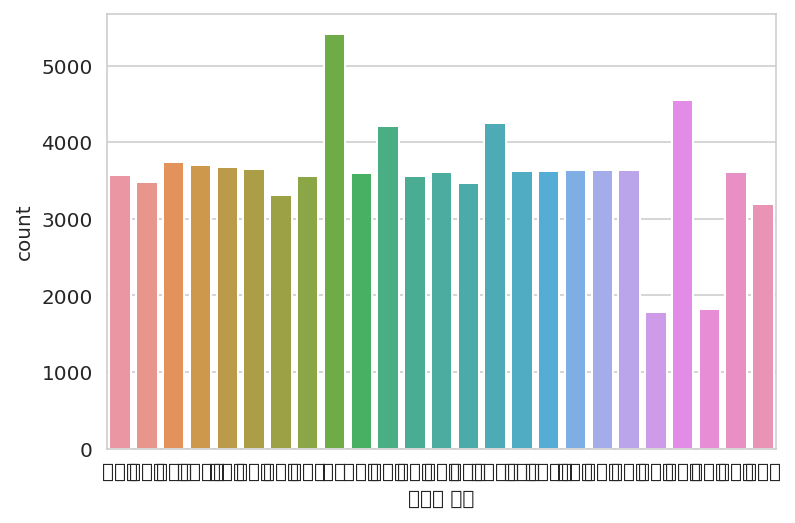

In [ ]:
sns.countplot(data=df, x='자치구 이름')

구별 시장 유형 정보

In [ ]:
df_market=df.groupby(['자치구 이름','시장 유형']).count()
df_market

시장/마트 이름  품목 번호  품목 이름  실판매규격  가격(원)  유형 코드    일자
자치구 이름 시장 유형                                                   
강남구    대형마트       1870   1870   1868   1870   1870   1870  1870
       전통시장       1870   1870   1868   1870   1870   1870  1870
강동구    대형마트       1819   1819   1817   1819   1819   1819  1819
       전통시장       1813   1813   1811   1813   1813   1813  1813
강북구    대형마트       1819   1819   1819   1819   1819   1819  1819
       전통시장       1785   1785   1785   1785   1785   1785  1785
강서구    대형마트       1819   1819   1819   1819   1819   1819  1819
       전통시장       1819   1819   1819   1819   1819   1819  1819
관악구    대형마트       1819   1819   1814   1819   1819   1819  1819
       전통시장       2733   2733   2727   2733   2733   2733  2733
광진구    대형마트       1802   1802   1802   1802   1802   1802  1802
       전통시장       1802   1802   1802   1802   1802   1802  1802
구로구    대형마트       1767   1767   1765   1767   1767   1767  1767
       전통시장       1785   1785   1783   1785   1785   1785  1785
금천구    대형마트       1598   1598   1598   1598   1598   1598  1598
       전통시장       1590   1590   1590   1590   1590   1590  1590
노원구    대형마트       1819   1819   1819   1819   1819   1819  1819
       전통시장       1802   1802   1802   1802   1802   1802  1802
도봉구    대형마트       1734   1734   1734   1734   1734   1734  1734
       전통시장       1734   1734   1734   1734   1734   1734  1734
동대문구   대형마트       1854   1854   1853   1854   1854   1854  1854
       전통시장       1853   1853   1851   1853   1853   1853  1853
동작구    대형마트        901    901    901    901    901    901   901
       전통시장        918    918    918    918    918    918   918
마포구    대형마트       1836   1836   1836   1836   1836   1836  1836
       전통시장       1802   1802   1802   1802   1802   1802  1802
서대문구   대형마트       1819   1819   1819   1819   1819   1819  1819
       전통시장       1802   1802   1802   1802   1802   1802  1802
서초구    대형마트       2617   2617   2617   2617   2617   2617  2617
       전통시장        867    867    867    867    867    867   867
성동구    대형마트       1801   1801   1801   1801   1801   1801  1801
       전통시장       1801   1801   1801   1801   1801   1801  1801
성북구    대형마트       1802   1802   1800   1802   1802   1802  1802
       전통시장       1761   1761   1759   1761   1761   1761  1761
송파구    대형마트       1836   1836   1836   1836   1836   1836  1836
       전통시장       1819   1819   1819   1819   1819   1819  1819
양천구    대형마트       2132   2132   2132   2132   2132   2132  2132
       전통시장       2080   2080   2080   2080   2080   2080  2080
영등포구   대형마트       2584   2584   2584   2584   2584   2584  2584
       전통시장       1666   1666   1666   1666   1666   1666  1666
용산구    대형마트       1836   1836   1834   1836   1836   1836  1836
       전통시장       1836   1836   1834   1836   1836   1836  1836
은평구    대형마트       1768   1768   1767   1768   1768   1768  1768
       전통시장       1803   1803   1801   1803   1803   1803  1803
종로구    전통시장       1785   1785   1785   1785   1785   1785  1785
중구     대형마트       3604   3604   3604   3604   3604   3604  3604
       전통시장       1802   1802   1802   1802   1802   1802  1802
중랑구    대형마트       1658   1658   1655   1658   1658   1658  1658
       전통시장       1657   1657   1653   1657   1657   1657  1657

상품별 시장 유형 분석

(1) 고등어

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

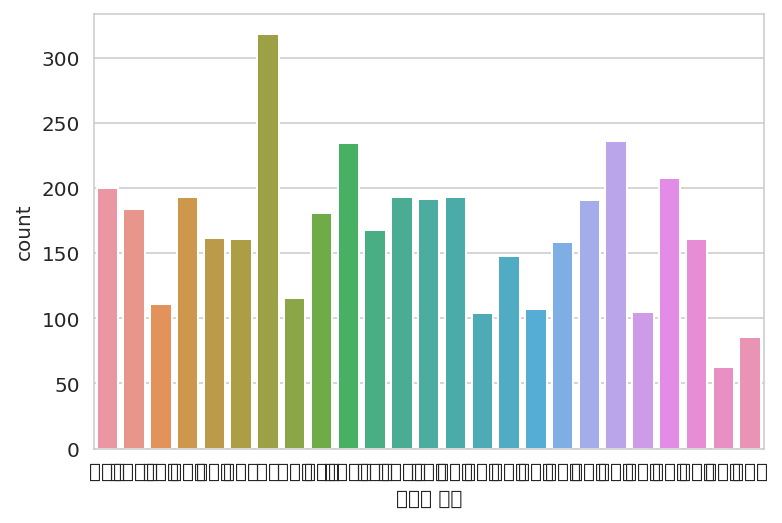

In [ ]:
sns.countplot(data=mackerel, x='자치구 이름') #고등어 데이터의 자치구 이름 분포 #다소 들쭉날쭉

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

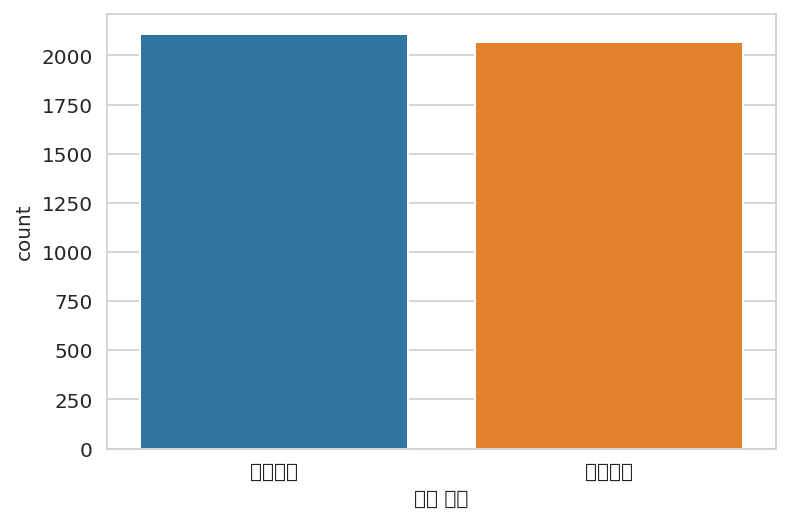

In [ ]:
#mackerel
sns.countplot(data=mackerel, x='시장 유형') #고등어 데이터의 시장 유형 분포

(2) 오징어

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_

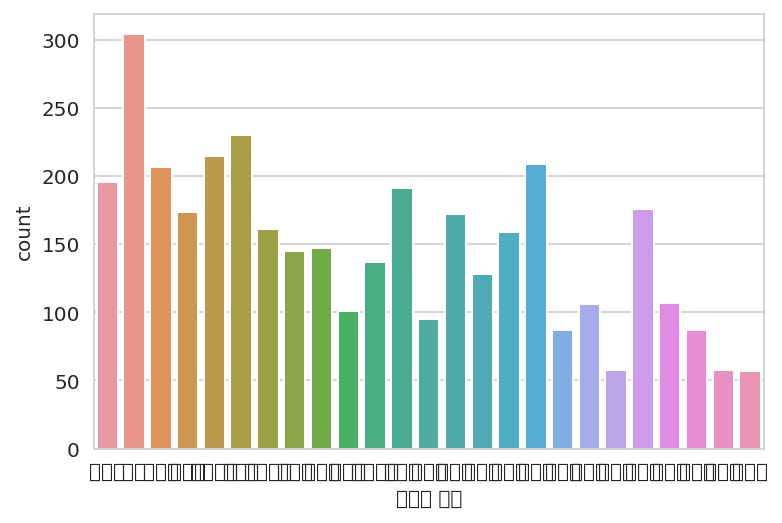

In [ ]:
sns.countplot(data=squid, x='자치구 이름')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

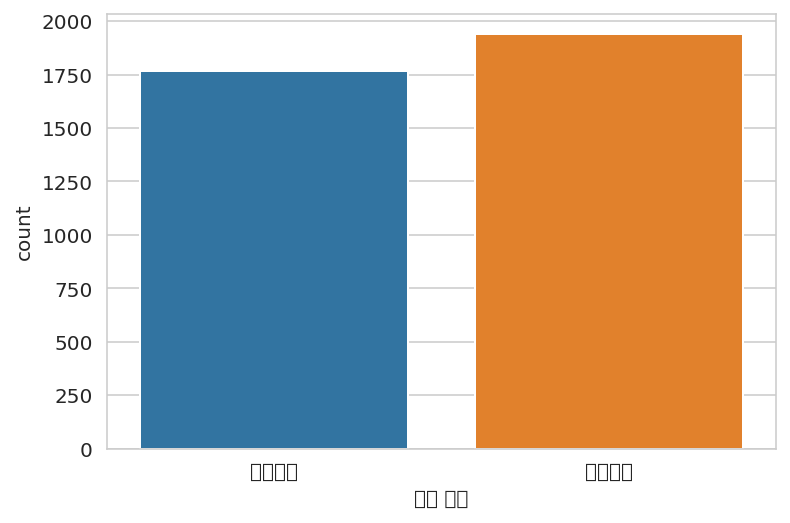

In [ ]:
#squid
sns.countplot(data=squid, x='시장 유형')

(3) 양배추

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46993 missing from current font.
  font.set_

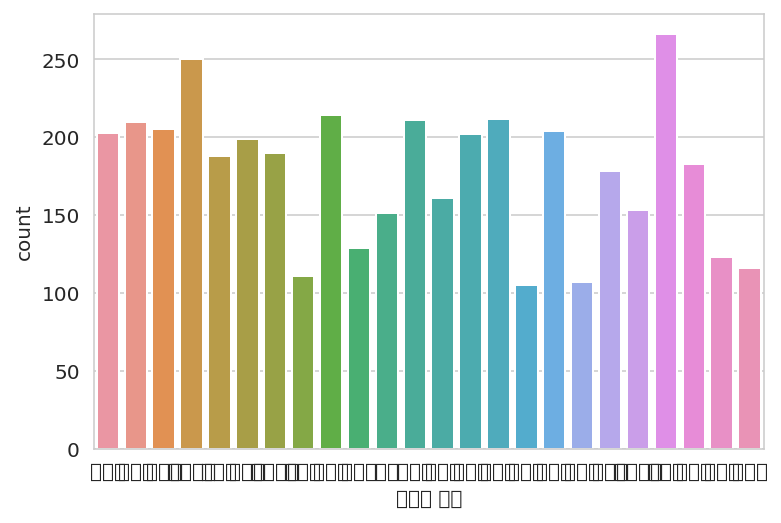

In [ ]:
sns.countplot(data=cabbage, x='자치구 이름')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

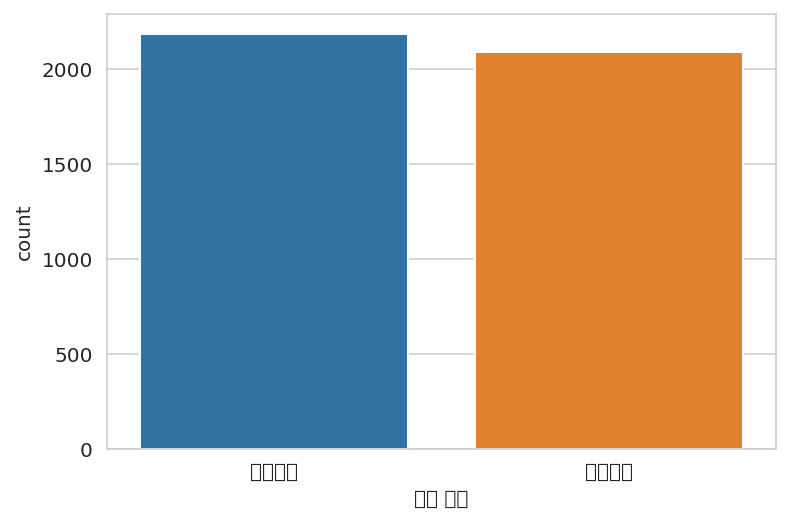

In [ ]:
#cabbage
sns.countplot(data=cabbage, x='시장 유형')

(4) 무

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

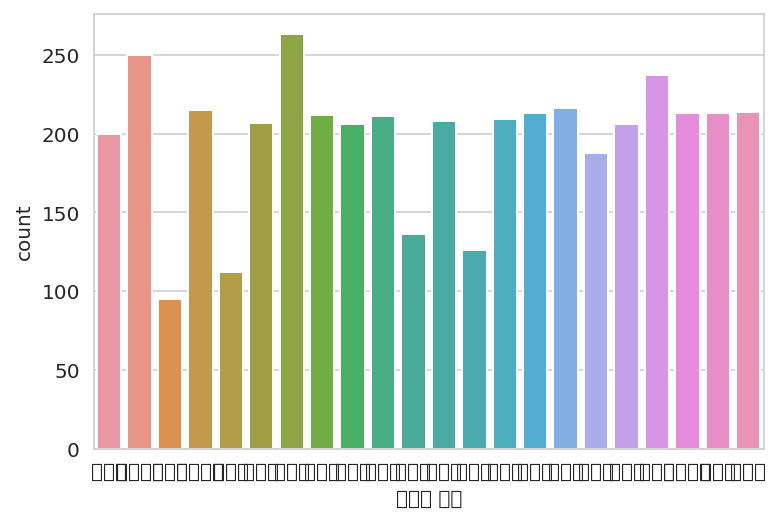

In [ ]:
sns.countplot(data=radish, x='자치구 이름')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

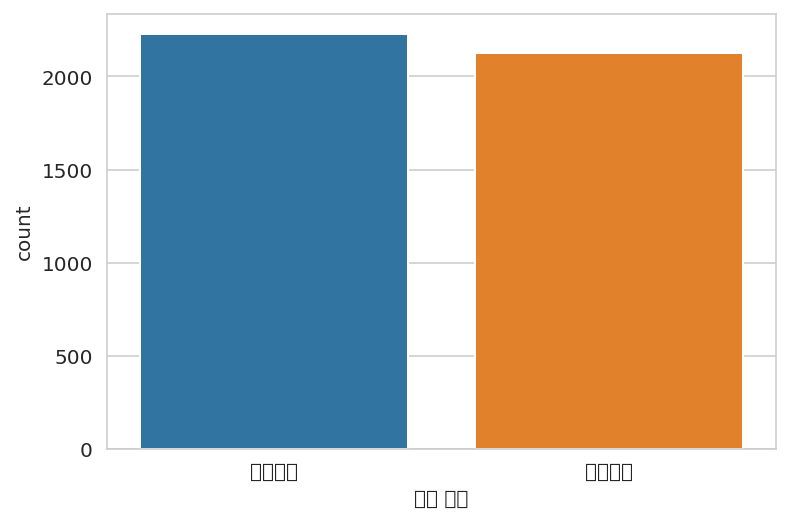

In [ ]:
#radish
sns.countplot(data=radish, x='시장 유형')

# 도매 데이터 불러오기


In [ ]:
from google.colab import files
files.upload()
#xlsx 파일을 직접 파일 라이브러리에서 업로드 할 수 있습니다. 한번에 여러개 가능.

In [ ]:
!pip install openpyxl #xlsx 파일을 하기에 앞서, 런타임에 존재하는 파일을 초기화합니다.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


각 xlsx 파일에 있어서 결측치는 없으나, 만일 파이썬 내에서 일자 / 평균으로 전처리가 추가로 필요하실 경우, 밑의 코드에 파일 이름을 복붙하시면 됩니다. xlsx파일은 무처럼 고랭지 행이 따로 있는 경우와, 고등어처럼 그냥 일자-평년-평균-서울 행으로 이루어진 경우가 있습니다. 각각 다른 전처리 과정을 넣어두었습니다.

###고등어 도매 가격의 경우

In [ ]:
#데이터 받아오기
mack_dome =pd.read_excel('/content/고등어도매_중품_10kg.xlsx') #엑셀파일을 받아와, csv파일로 변환
mack_dome.to_csv('고등어도매_10kg')
mack_dome = pd.read_csv('고등어도매_10kg')

#데이터 전처리
mack_dome = mack_dome.transpose() #행과 열 뒤집기
mack_dome.reset_index(level=0, inplace=True) #인덱스가 된 일자를 열로 들여옴
mack_dome = mack_dome.drop(0, axis=0) #불필요한 첫번째 행 삭제
mack_dome.columns = ['일자', '평균'] #컬럼 이름을 변경
mack_dome = mack_dome.drop(1, axis=0) #불필요한 두번쨰 행 삭제
mack_dome.reset_index(drop=True, inplace=True) #인덱스 초기화
mack_dome.head()

###무 도매 가격의 경우

In [ ]:
#데이터 받아오기
radi_dome =pd.read_excel('/content/무도매_중품_20kg.xlsx') #엑셀파일을 받아와, csv파일로 변환
radi_dome.to_csv('무도매')
radi_dome = pd.read_csv('무도매')

#데이터 전처리
radi_dome = radi_dome.transpose() #행과 열 뒤집기
radi_dome.reset_index(level=0, inplace=True) #인덱스가 된 일자를 열로 들여옴
radi_dome = radi_dome.drop(0, axis=0) #불필요한 첫번째 행 삭제
radi_dome.columns = ['일자', '평균'] #컬럼 이름을 변경
radi_dome = radi_dome.drop(1, axis=0) #불필요한 두번쨰 행 삭제
radi_dome=radi_dome.dropna(axis=0) #결측치 삭제
radi_dome.reset_index(drop=True, inplace=True) #인덱스 초기화
radi_dome.head()

###배 도매의 경우

In [ ]:
#데이터 받아오기
pear_dome =pd.read_excel('/content/배도매_중품_15kg.xlsx') #엑셀파일을 받아와, csv파일로 변환
pear_dome.to_csv('배도매')
pear_dome = pd.read_csv('배도매')

#데이터 전처리
pear_dome = pear_dome.transpose() #행과 열 뒤집기
pear_dome.reset_index(level=0, inplace=True) #인덱스가 된 일자를 열로 들여옴
pear_dome = pear_dome.drop(0, axis=0) #불필요한 첫번째 행 삭제
pear_dome.columns = ['일자', '평균'] #컬럼 이름을 변경
pear_dome = pear_dome.drop(1, axis=0) #불필요한 두번쨰 행 삭제
pear_dome.reset_index(drop=True, inplace=True) #인덱스 초기화
pear_dome.head()

###배추 도매의 경우

In [ ]:
#데이터 받아오기
cabb_dome =pd.read_excel('/content/배추도매_중품_10kg.xlsx') #엑셀파일을 받아와, csv파일로 변환
cabb_dome.to_csv('배추도매')
cabb_dome = pd.read_csv('배추도매')

#데이터 전처리
cabb_dome = cabb_dome.transpose() #행과 열 뒤집기
cabb_dome.reset_index(level=0, inplace=True) #인덱스가 된 일자를 열로 들여옴
cabb_dome = cabb_dome.drop(0, axis=0) #불필요한 첫번째 행 삭제
cabb_dome.columns = ['일자', '평균'] #컬럼 이름을 변경
cabb_dome = cabb_dome.drop(1, axis=0) #불필요한 두번쨰 행 삭제
cabb_dome=cabb_dome.dropna(axis=0) #결측치 삭제
cabb_dome.reset_index(drop=True, inplace=True) #인덱스 초기화
cabb_dome.head()

###오징어 도매의 경우

In [ ]:
#데이터 받아오기
squid_dome =pd.read_excel('/content/오징어도매_중품_1kg.xlsx') #엑셀파일을 받아와, csv파일로 변환
squid_dome.to_csv('오징어도매')
squid_dome = pd.read_csv('오징어도매')

#데이터 전처리
squid_dome = squid_dome.transpose() #행과 열 뒤집기
squid_dome.reset_index(level=0, inplace=True) #인덱스가 된 일자를 열로 들여옴
squid_dome = squid_dome.drop(0, axis=0) #불필요한 첫번째 행 삭제
squid_dome.columns = ['일자', '평균'] #컬럼 이름을 변경
squid_dome = squid_dome.drop(1, axis=0) #불필요한 두번쨰 행 삭제
squid_dome.reset_index(drop=True, inplace=True) #인덱스 초기화
squid_dome.head()

#도메데이터 처리하기 (예시)

밑의 코드는 엑셀로 전처리가 된 파일에 대하여 조금 수정한 세로 전처리 입니다.
다음과 같이 전처리 해주시면 됩니다.

In [ ]:
mack_dome =pd.read_excel('/content/고등어도매_중품_10kg.xlsx')
mack_dome.to_csv('고등어도매')
mack_dome = mack_dome.transpose() #행과 열 뒤집기
mack_dome.reset_index(level=0, inplace=True) #인덱스가 된 일자를 열로 들여옴
mack_dome = mack_dome.drop(0, axis=0) #불필요한 첫번째 행 삭제
mack_dome.columns = ['일자', '평균'] #컬럼 이름을 변경
mack_dome=mack_dome.dropna(axis=0) #결측치 삭제
mack_dome.reset_index(drop=True, inplace=True) #인덱스 초기화
mack_dome.head()

,일자,평균
0,01/04,59000
1,01/05,61600
2,01/06,61600
3,01/07,61600
4,01/08,61600


In [ ]:
mack_dome['일자'] = pd.to_datetime(mack_dome['일자'], format='%m/%d')
mack_dome.dtypes
#mack_dome의 일자도 혹시 몰라 같은 datetime형으로 바꿔줬습니다.

일자    datetime64[ns]
평균            object
dtype: object

#선형회귀 코드

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from math import sqrt

###배

In [ ]:
# 인덱스 추출
# 독립변수 X는 품목번호, 단위, 시장 유형
pX = pear.drop(['일자','품목','시장/마트 이름','시장 유형','가격(원)'], axis=1) 
# 종속변수 y는 가격
py = pear[['가격(원)']]
pX_train, pX_test, py_train, py_test = train_test_split(pX, py, test_size=0.3, random_state=5)

pLR = LinearRegression()
pLR.fit(X_train, y_train)

In [ ]:
print(pLR.score(pX_train, py_train))
print(pLR.score(pX_test, py_test))

###고등어

In [ ]:
# 인덱스 추출
# 독립변수 X는 품목번호, 단위, 시장 유형
mX = mackerel.drop(['일자','품목','시장/마트 이름','시장 유형','가격(원)'], axis=1) 
# 종속변수 y는 가격
my = mackerel[['가격(원)']]
mX_train, mX_test, my_train, my_test = train_test_split(mX, my, test_size=0.3, random_state=5)

mLR = LinearRegression()
mLR.fit(X_train, y_train)

In [ ]:
print(mLR.score(mX_train, my_train))
print(mLR.score(mX_test, my_test))

###오징어

In [ ]:
# 인덱스 추출
# 독립변수 X는 품목번호, 단위, 시장 유형
sX = squid.drop(['일자','품목','시장/마트 이름','시장 유형','가격(원)'], axis=1) 
# 종속변수 y는 가격
sy = squid[['가격(원)']]
sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.3, random_state=5)

sLR = LinearRegression()
sLR.fit(sX_train, sy_train)

In [ ]:
print(sLR.score(sX_train, sy_train))
print(sLR.score(sX_test, sy_test))

###무

In [ ]:
# 인덱스 추출
# 독립변수 X는 품목번호, 단위, 시장 유형
rX = radish.drop(['일자','품목','시장/마트 이름','시장 유형','가격(원)'], axis=1) 
# 종속변수 y는 가격
ry = radish[['가격(원)']]
rX_train, rX_test, ry_train, ry_test = train_test_split(rX, ry, test_size=0.3, random_state=5)

rLR = LinearRegression()
rLR.fit(rX_train, ry_train)

In [ ]:
print(rLR.score(rX_train, ry_train))
print(rLR.score(rX_test, ry_test))

### 배추

In [ ]:
# 인덱스 추출
# 독립변수 X는 품목번호, 단위, 시장 유형
cX = cabbage.drop(['일자','품목','시장/마트 이름','시장 유형','가격(원)'], axis=1) 
# 종속변수 y는 가격
cy = cabbage[['가격(원)']]
cX_train, cX_test, cy_train, cy_test = train_test_split(cX, cy, test_size=0.3, random_state=5)

cLR = LinearRegression()
cLR.fit(cX_train, cy_train)

In [ ]:
print(cLR.score(cX_train, cy_train))
print(cLR.score(cX_test, cy_test))